In [1]:
#import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
#import dataset 
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#rows and columns
print('no of rows ',df.shape[0])
print('no of columns ',df.shape[1])

no of rows  1025
no of columns  14


In [4]:
#head command
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# checking the dtypes detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#number of missing values for each feature
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
cats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
nums = ['age', 'trestbps', 'chol', 'thalach']

In [9]:
#d type what pandas has decided it is 
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# explore statistical values 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [11]:
def pairplot_hue_combined(df, hue1, hue2, _vars):
    temp_df = df.copy()
    temp_df['{}_{}'.format(hue1, hue2)] = temp_df[hue1].astype(str) + ' ' + temp_df[hue2].astype(str)
    sns.pairplot(temp_df, vars=_vars, hue='{}_{}'.format(hue1, hue2))
    plt.show()
    freqs = temp_df['{}_{}'.format(hue1, hue2)].value_counts()
    plt.pie(freqs, labels=freqs.index, autopct='%0.2f%%')
    plt.show()

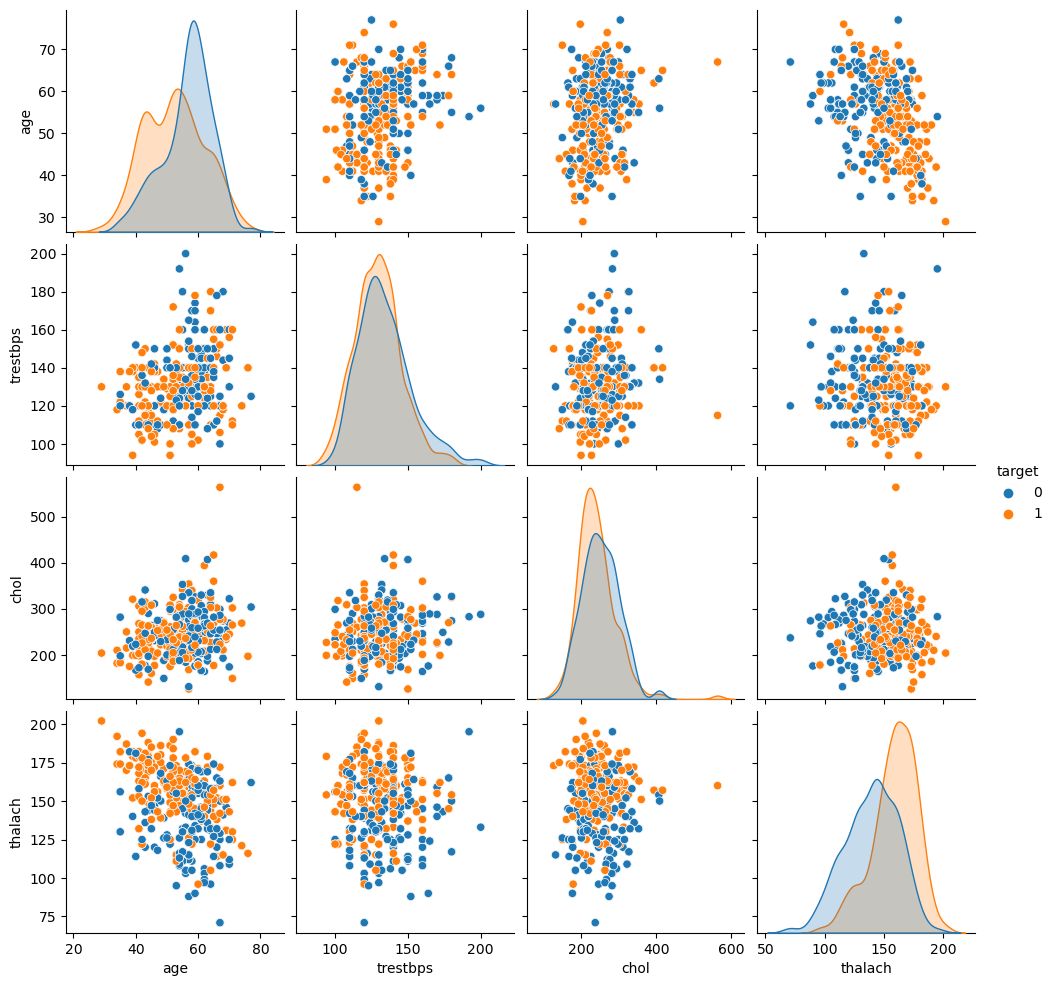

In [12]:
sns.pairplot(df, vars=nums, hue='target')
plt.show()


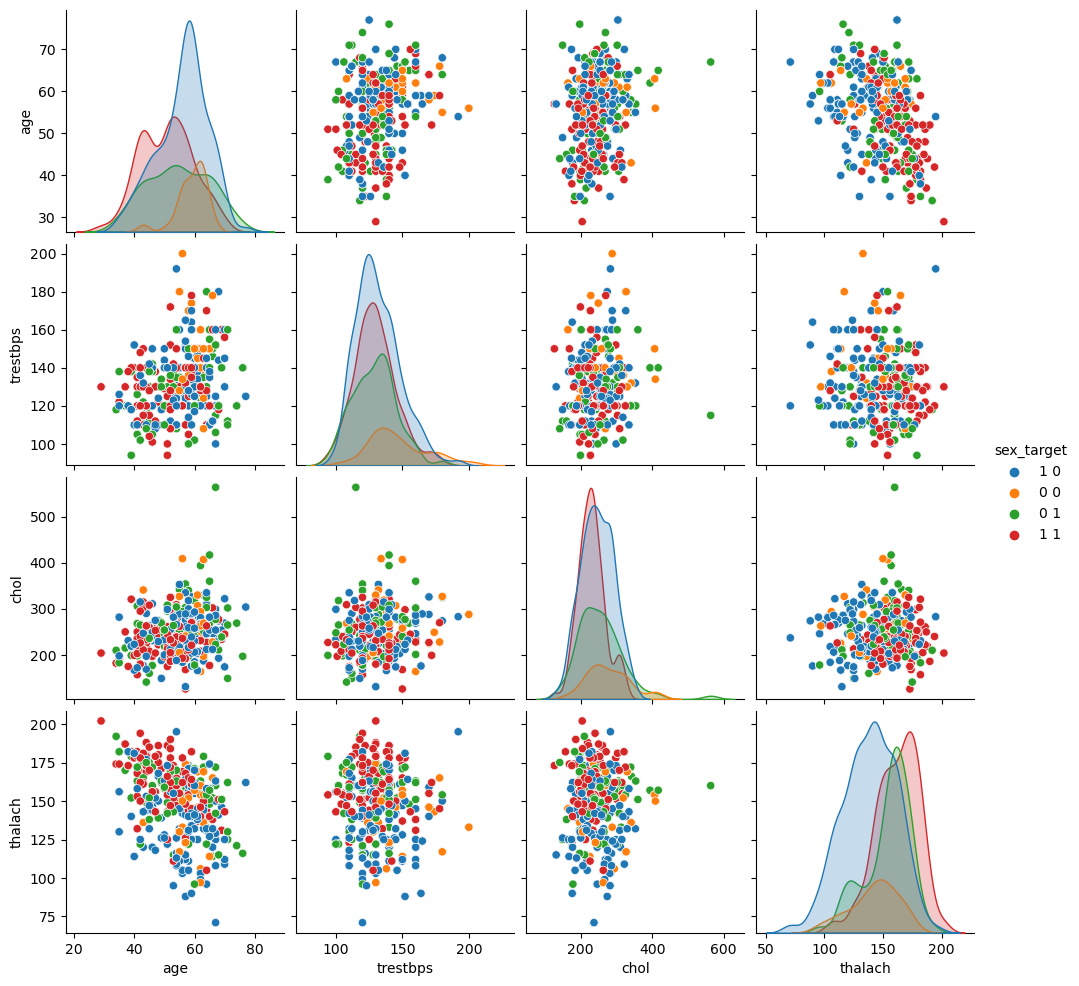

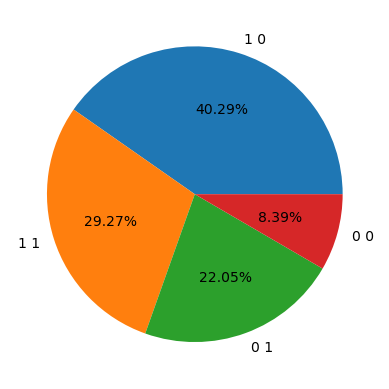

In [13]:
pairplot_hue_combined(df, 'sex', 'target', nums)

NameError: name 'df' is not defined

<Figure size 1000x1000 with 0 Axes>

In [14]:
#Relationship between numerical variables and data distribution showed in histplots, barplots and boxplots
def plots_num_cat(df, x, y):
    fig, axes = plt.subplots(nrows=3, ncols=len(x), figsize=(15, 11))
    groped = df.groupby(y)
    for i in range(len(x)):
        sns.histplot(df, x=x[i], hue=y, ax=axes[0][i], kde=True)
        means = groped[x[i]].mean()
        sns.barplot(x=means.index, y=means, ax=axes[1][i])
        for container in axes[1][i].containers:
            axes[1][i].bar_label(container, size=12)
            
        sns.boxplot(x=df[y], y=df[x[i]], ax=axes[2][i])
        
    plt.suptitle("Values distributed by {}".format(y), size=20)
        
    plt.tight_layout()
    plt.show()

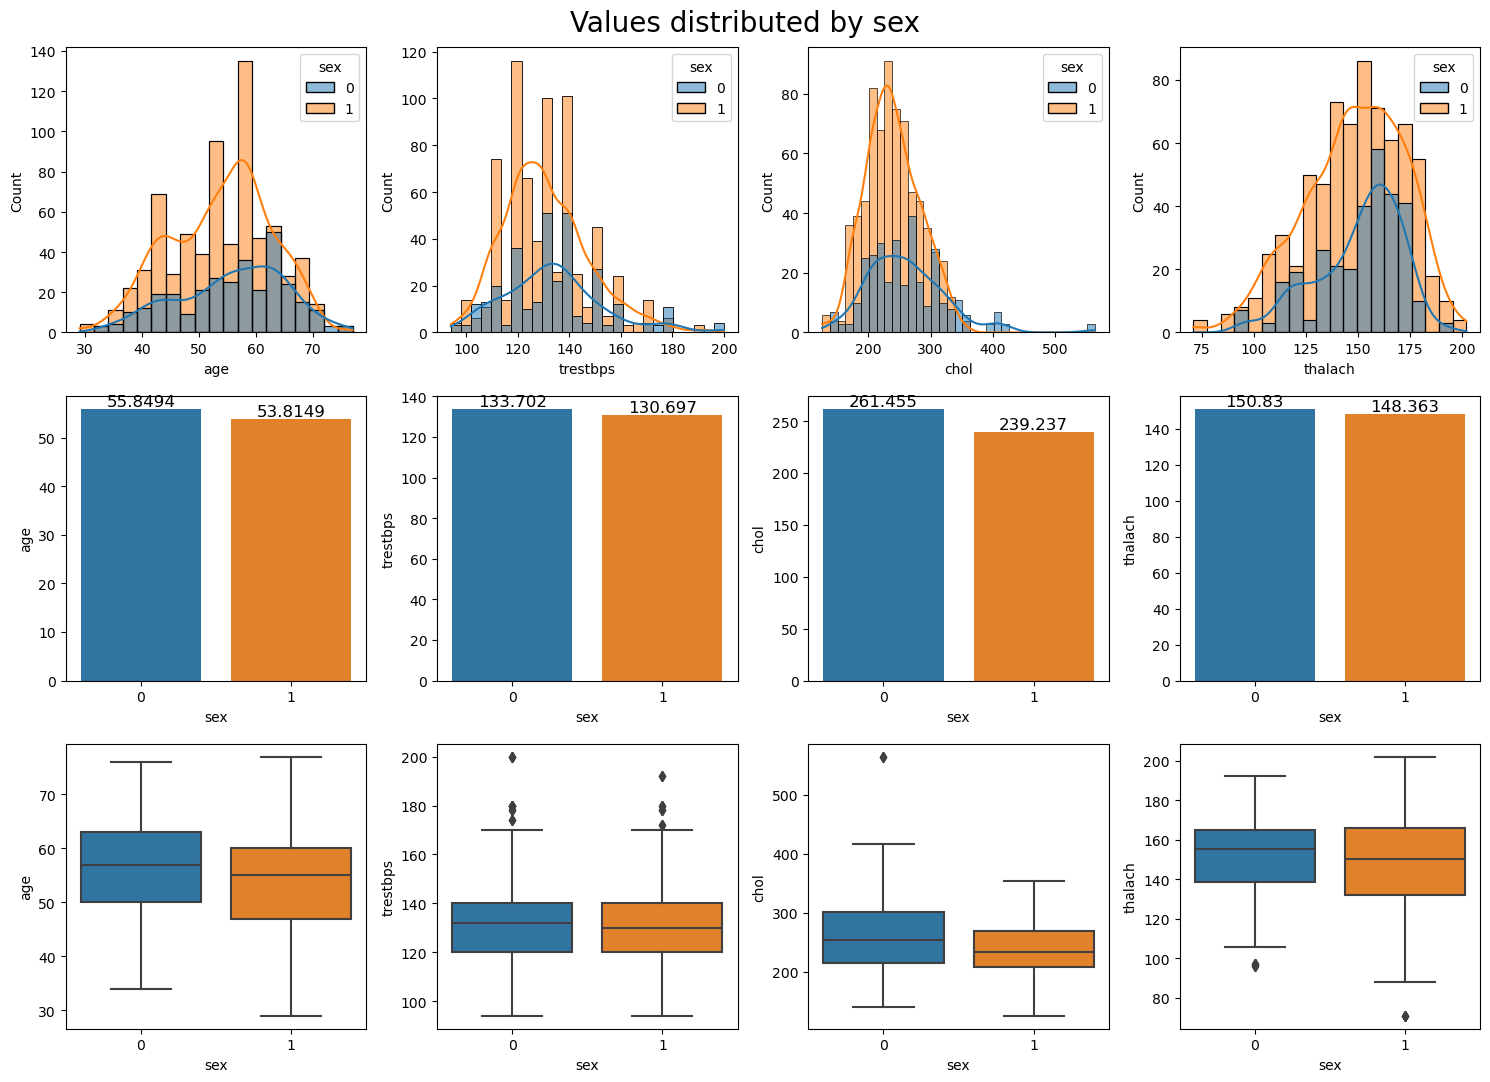

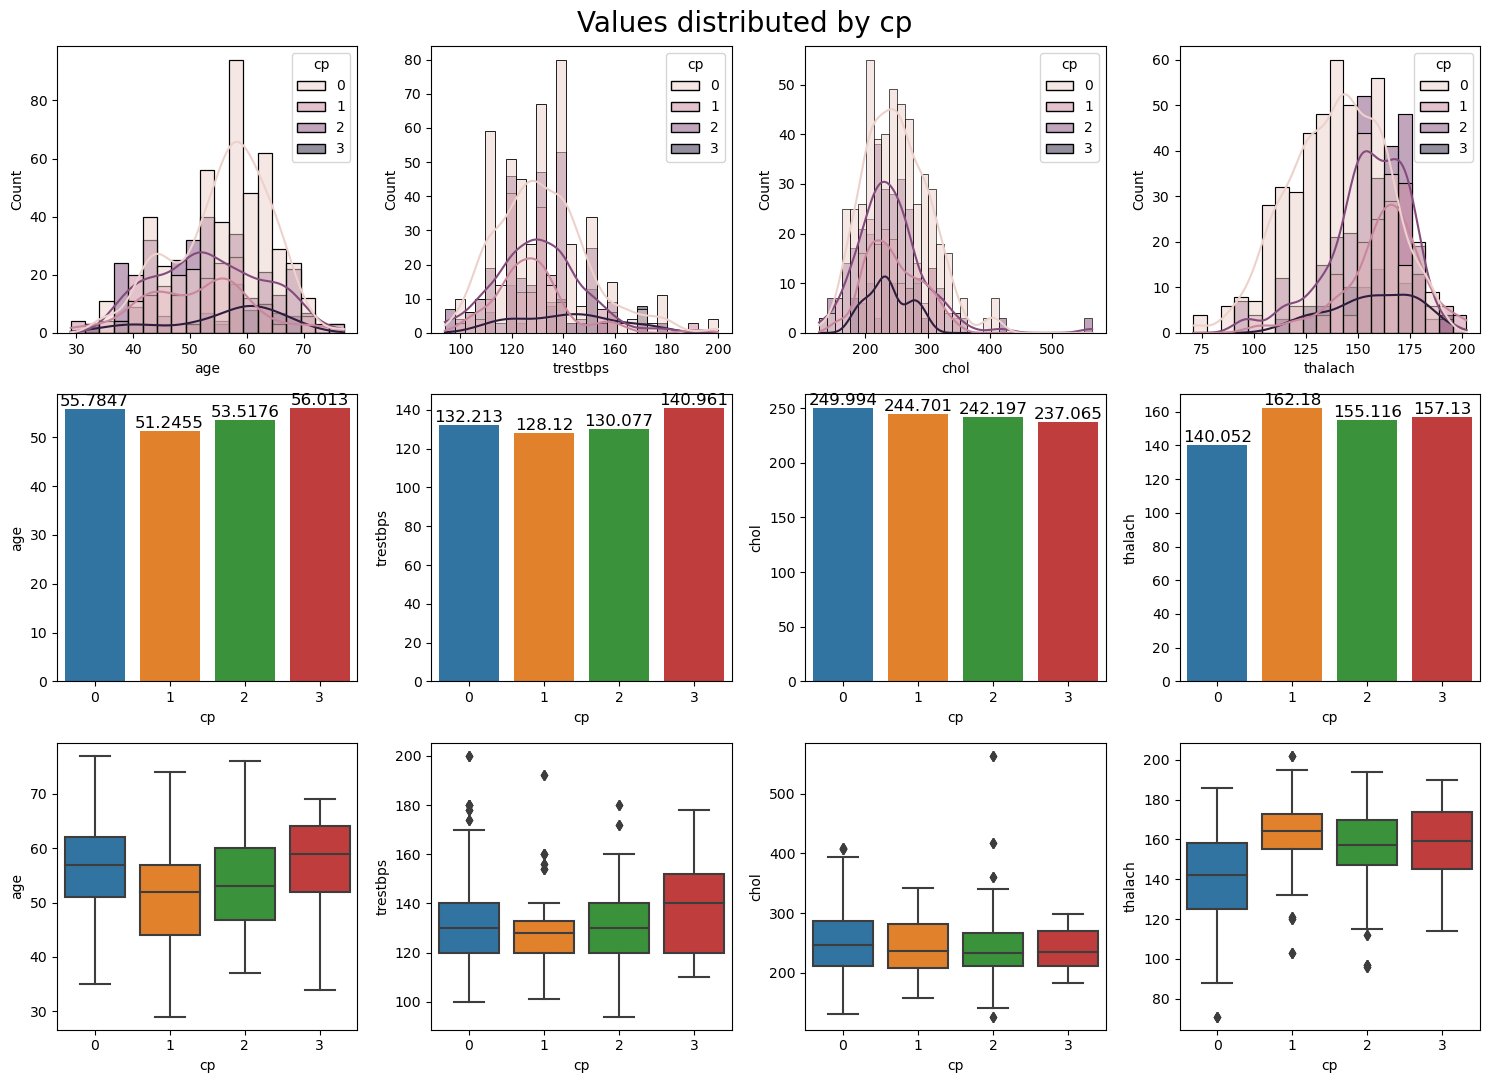

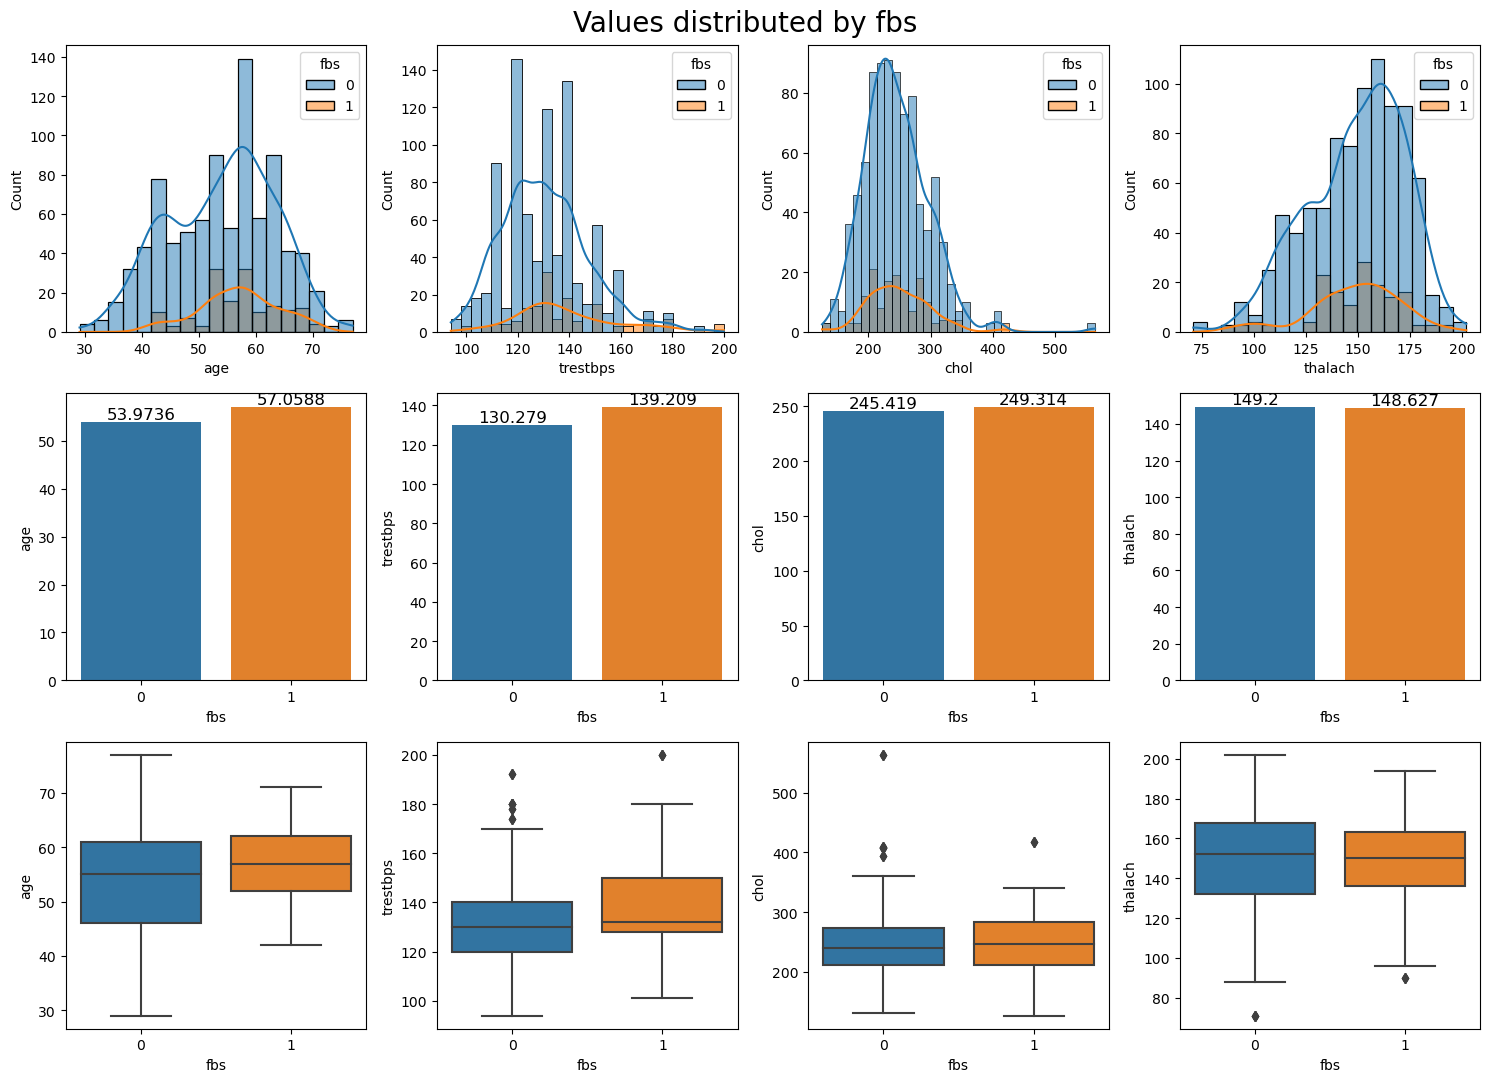

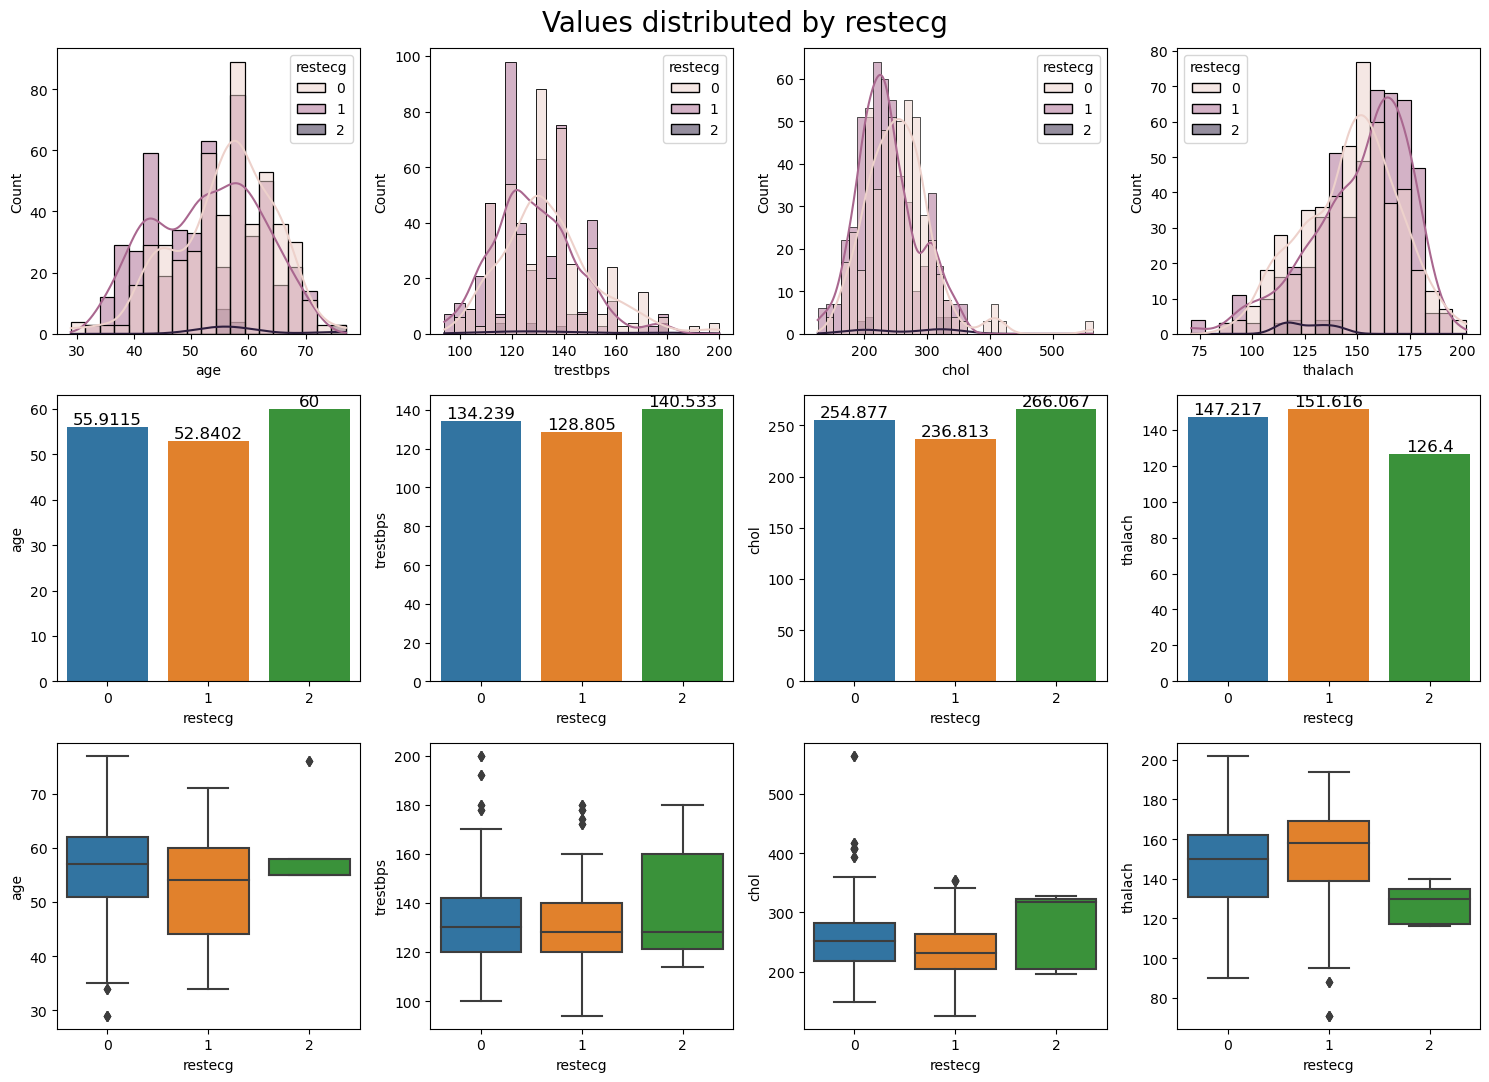

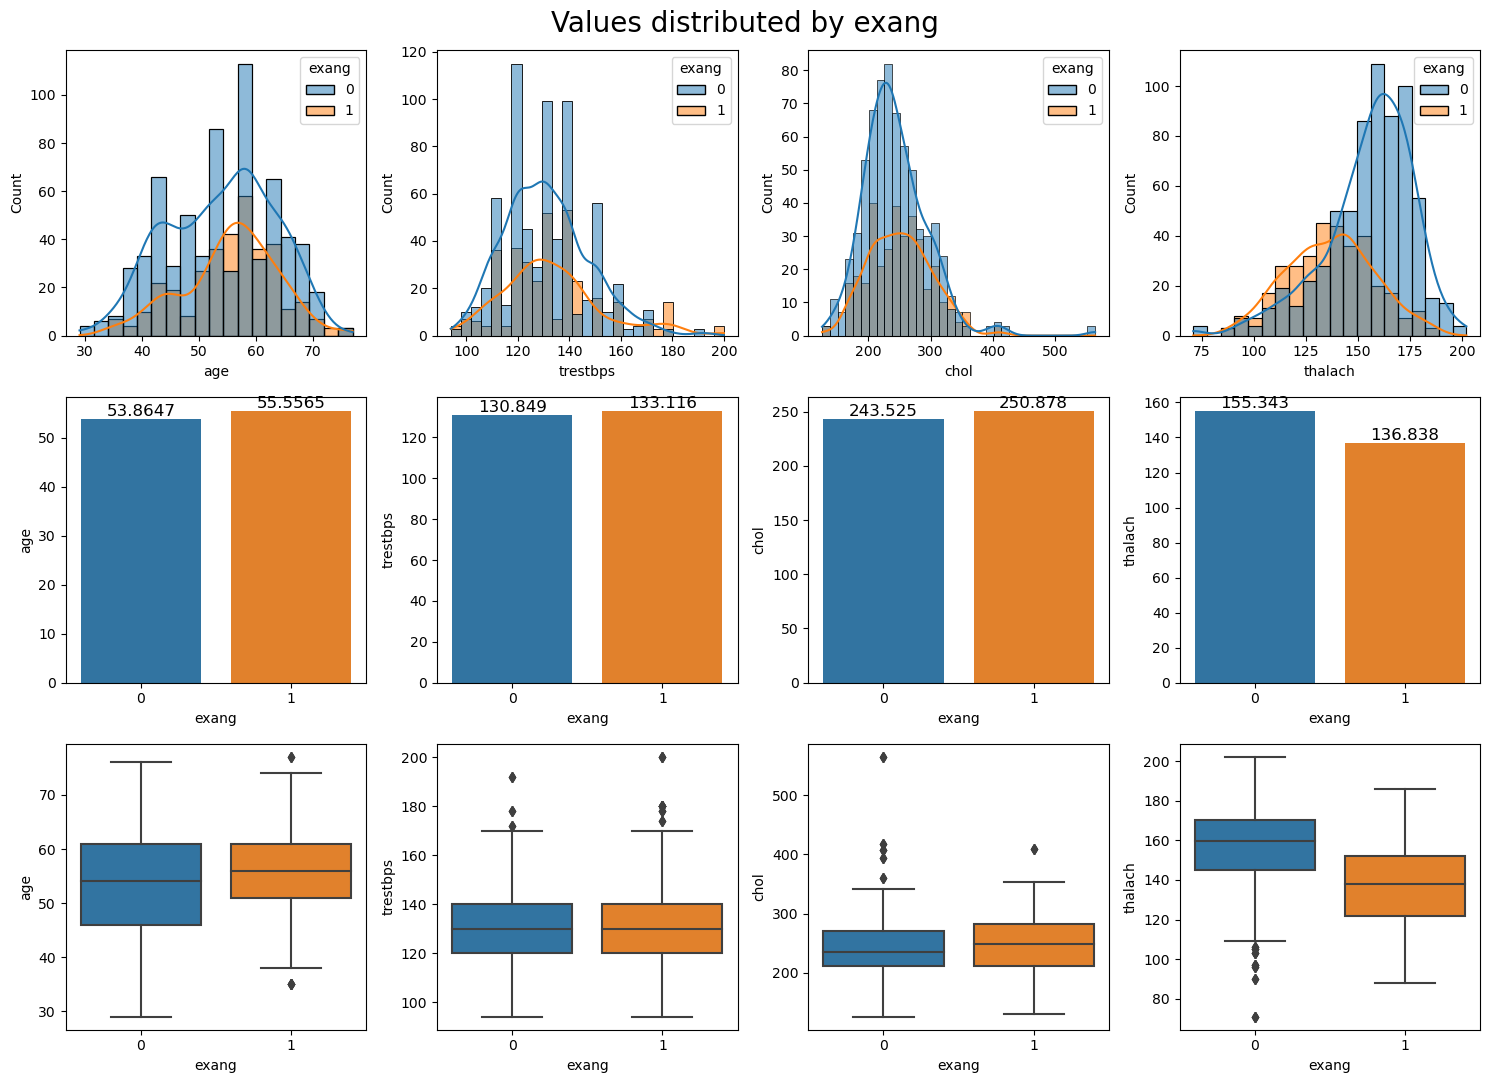

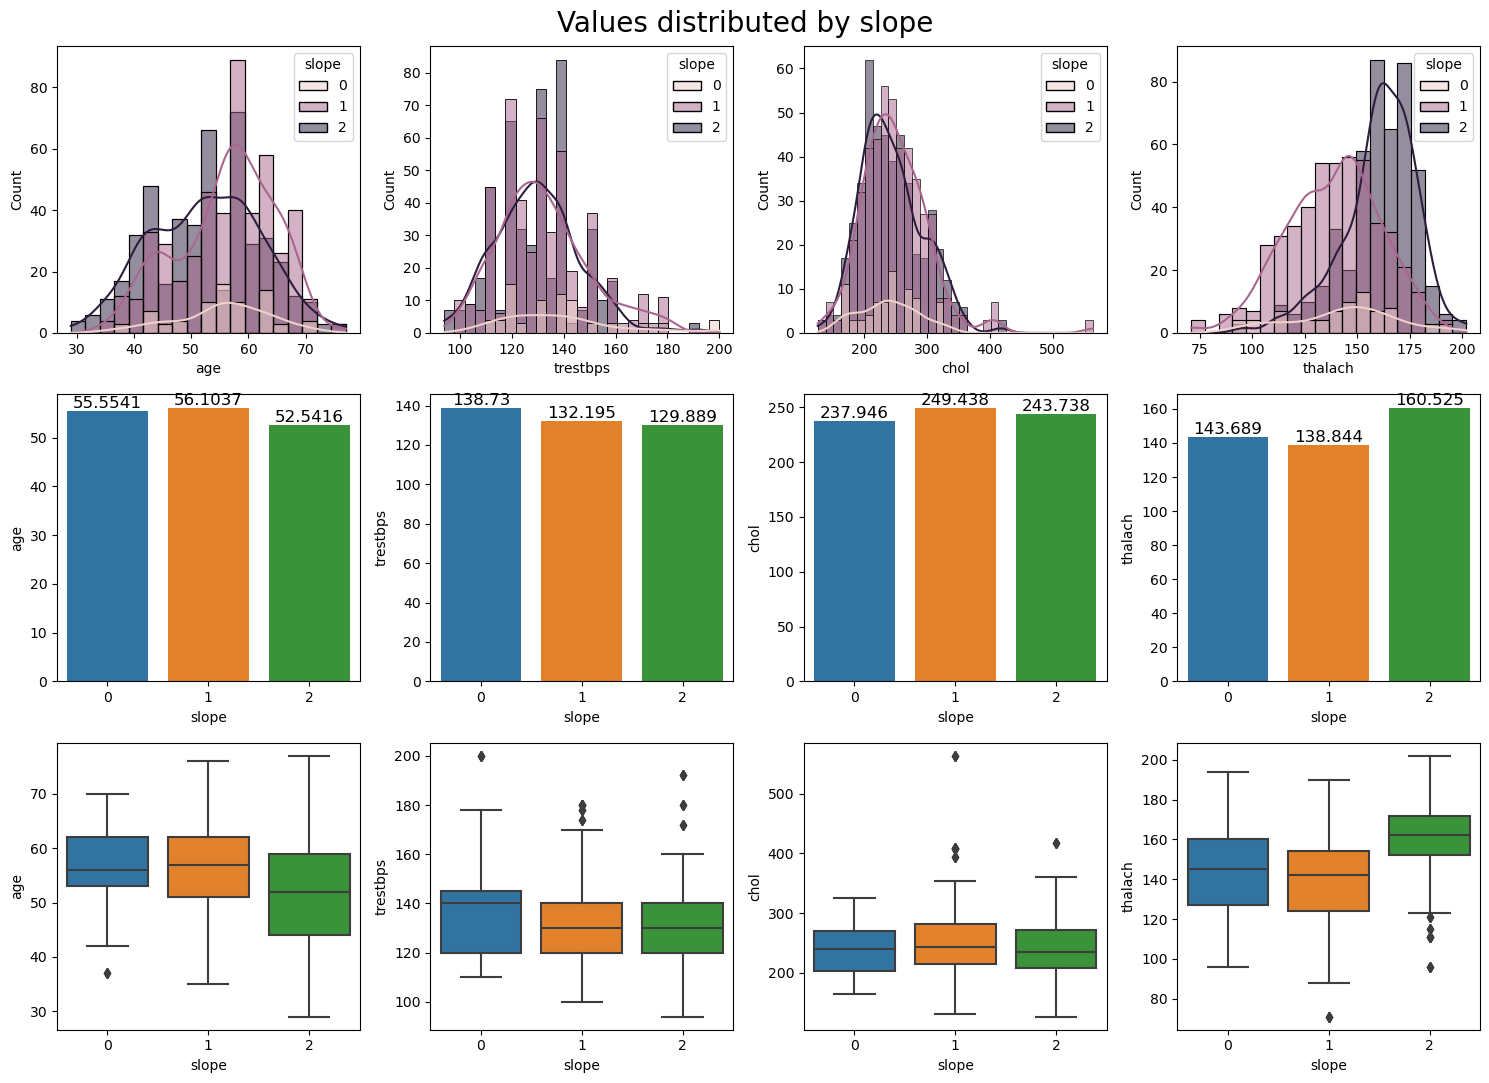

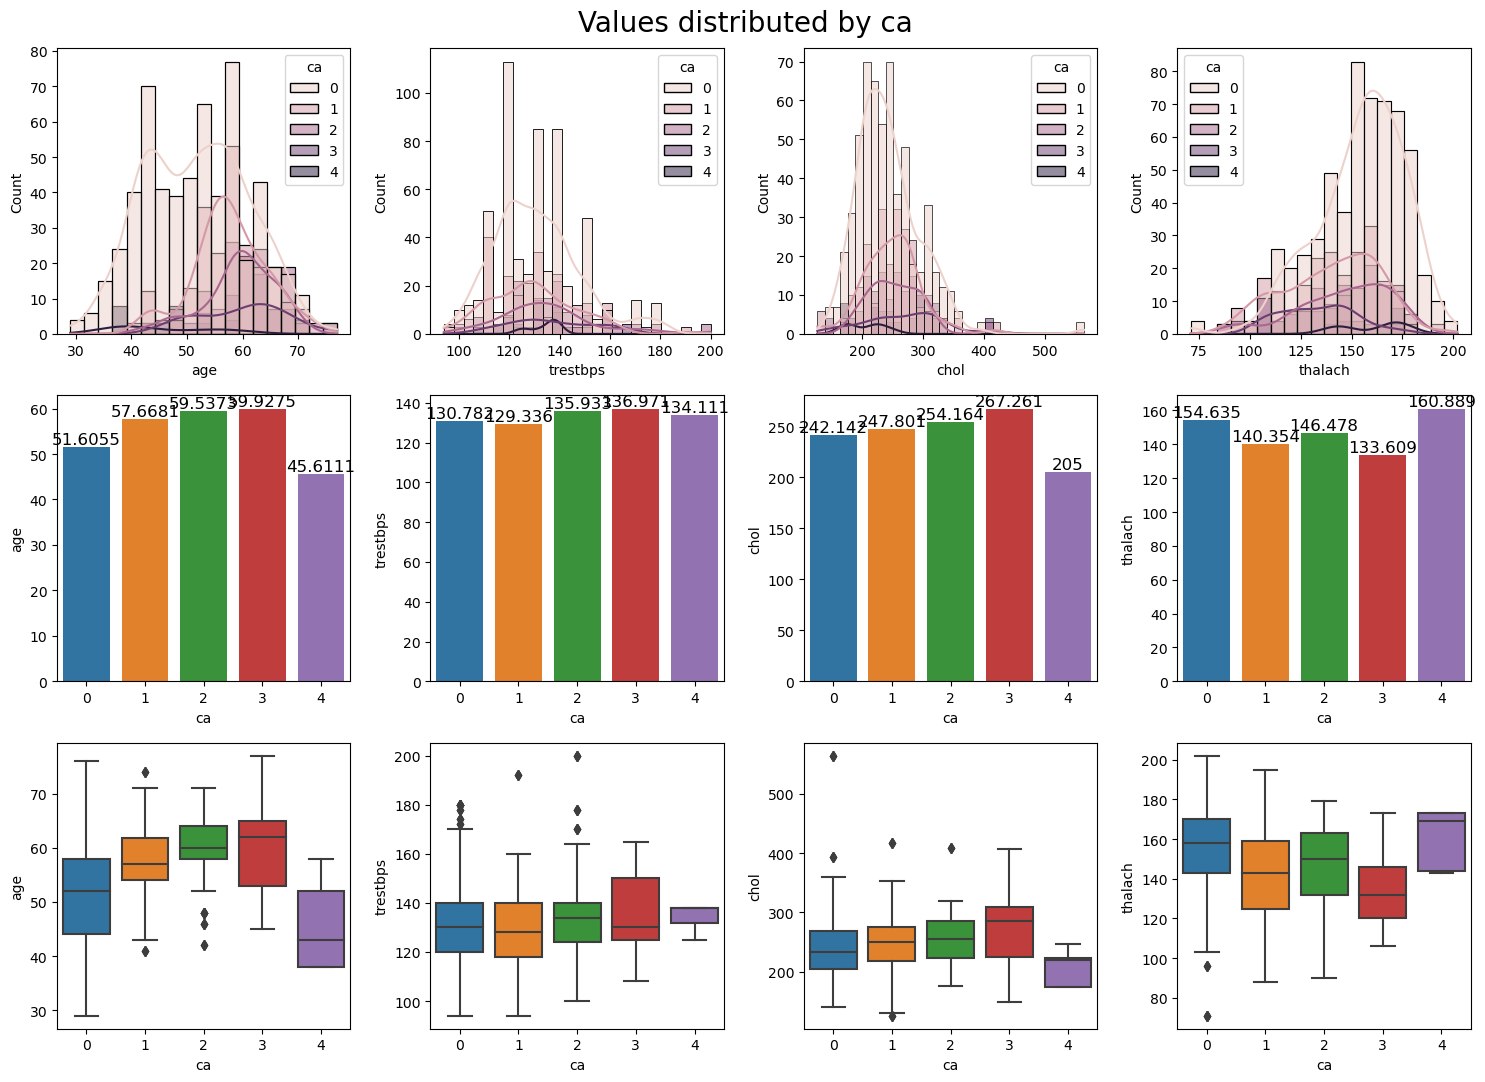

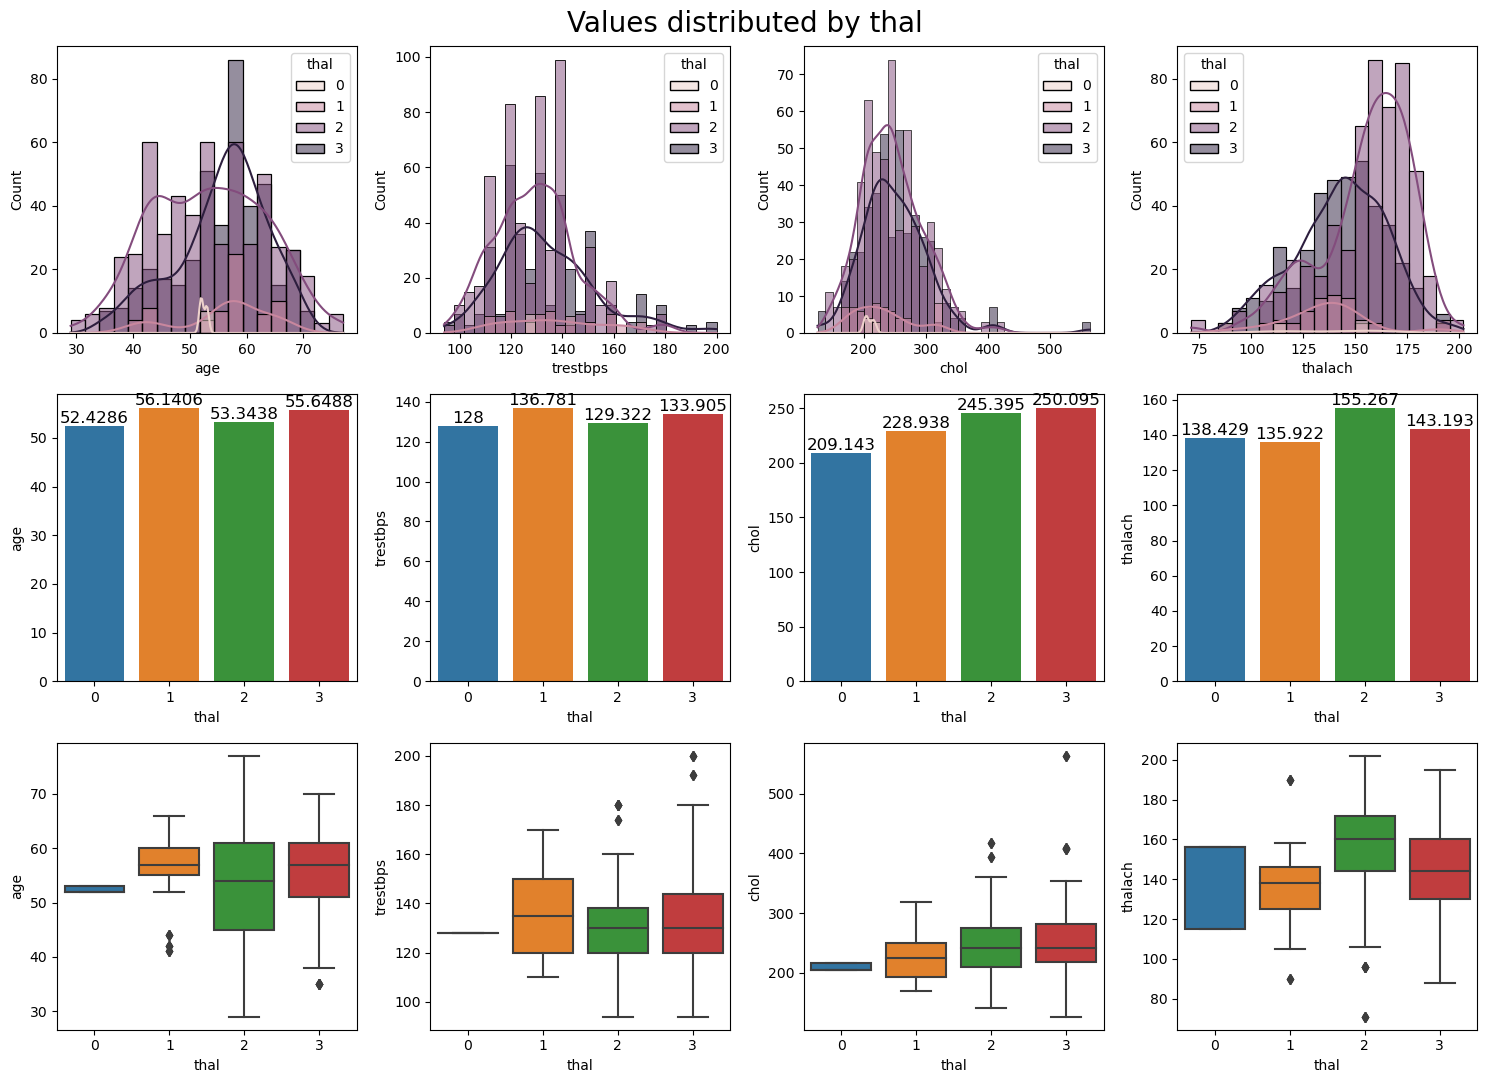

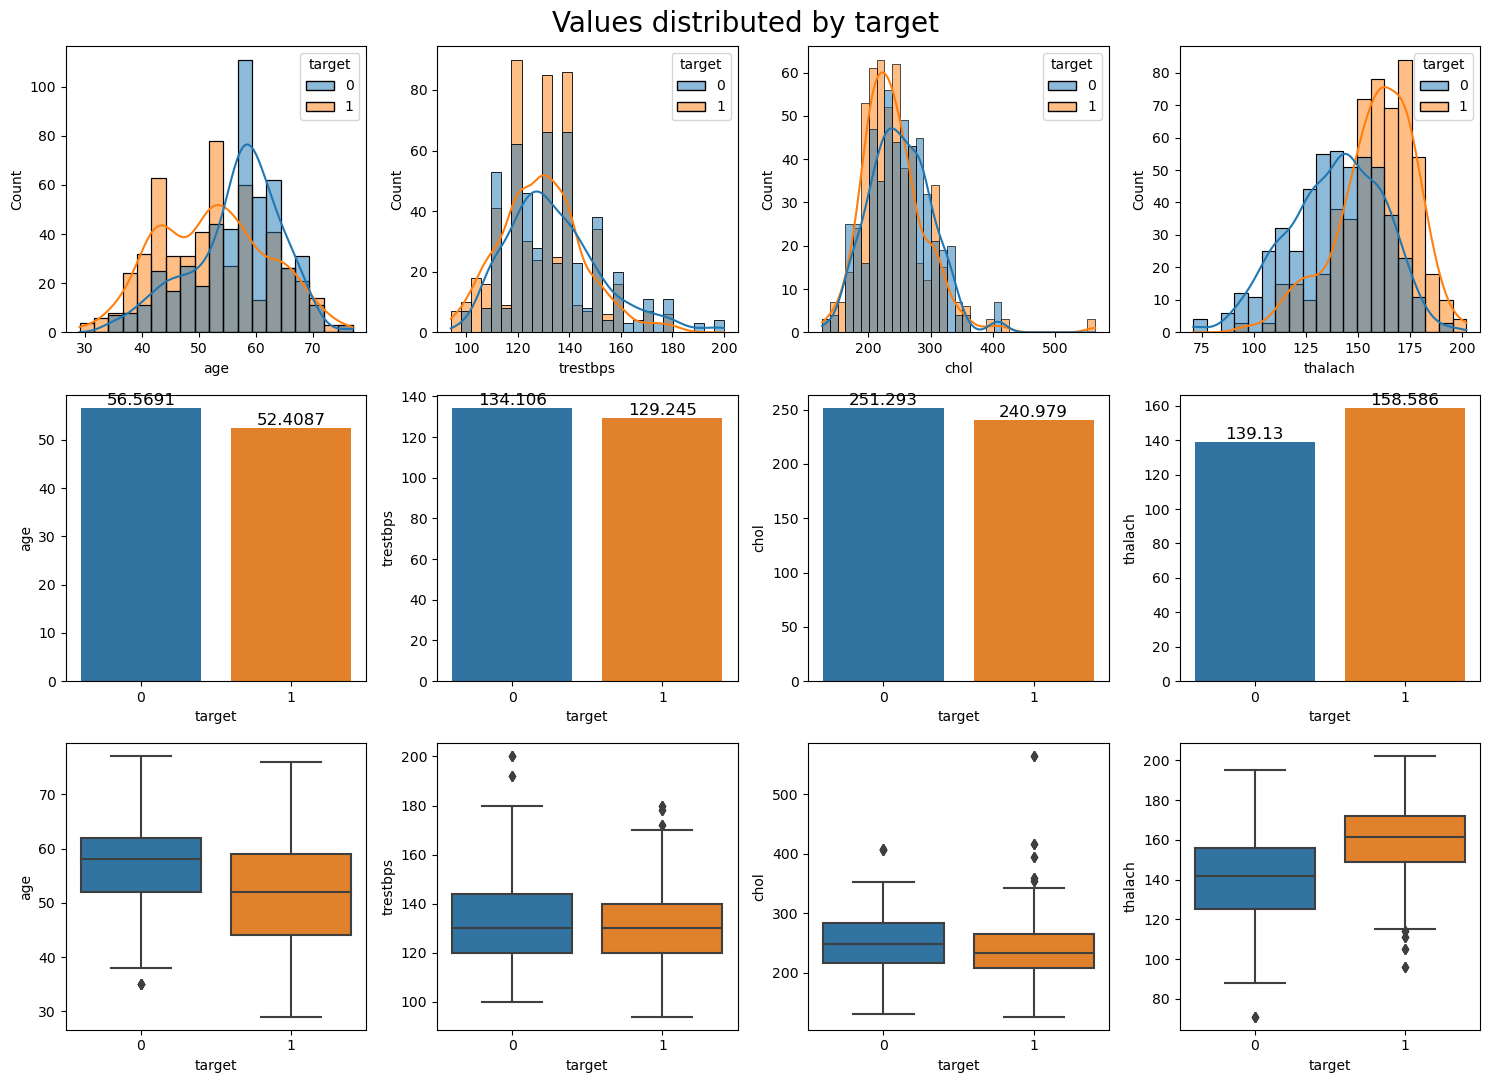

In [15]:
for i in cats:
    plots_num_cat(df, nums, i)


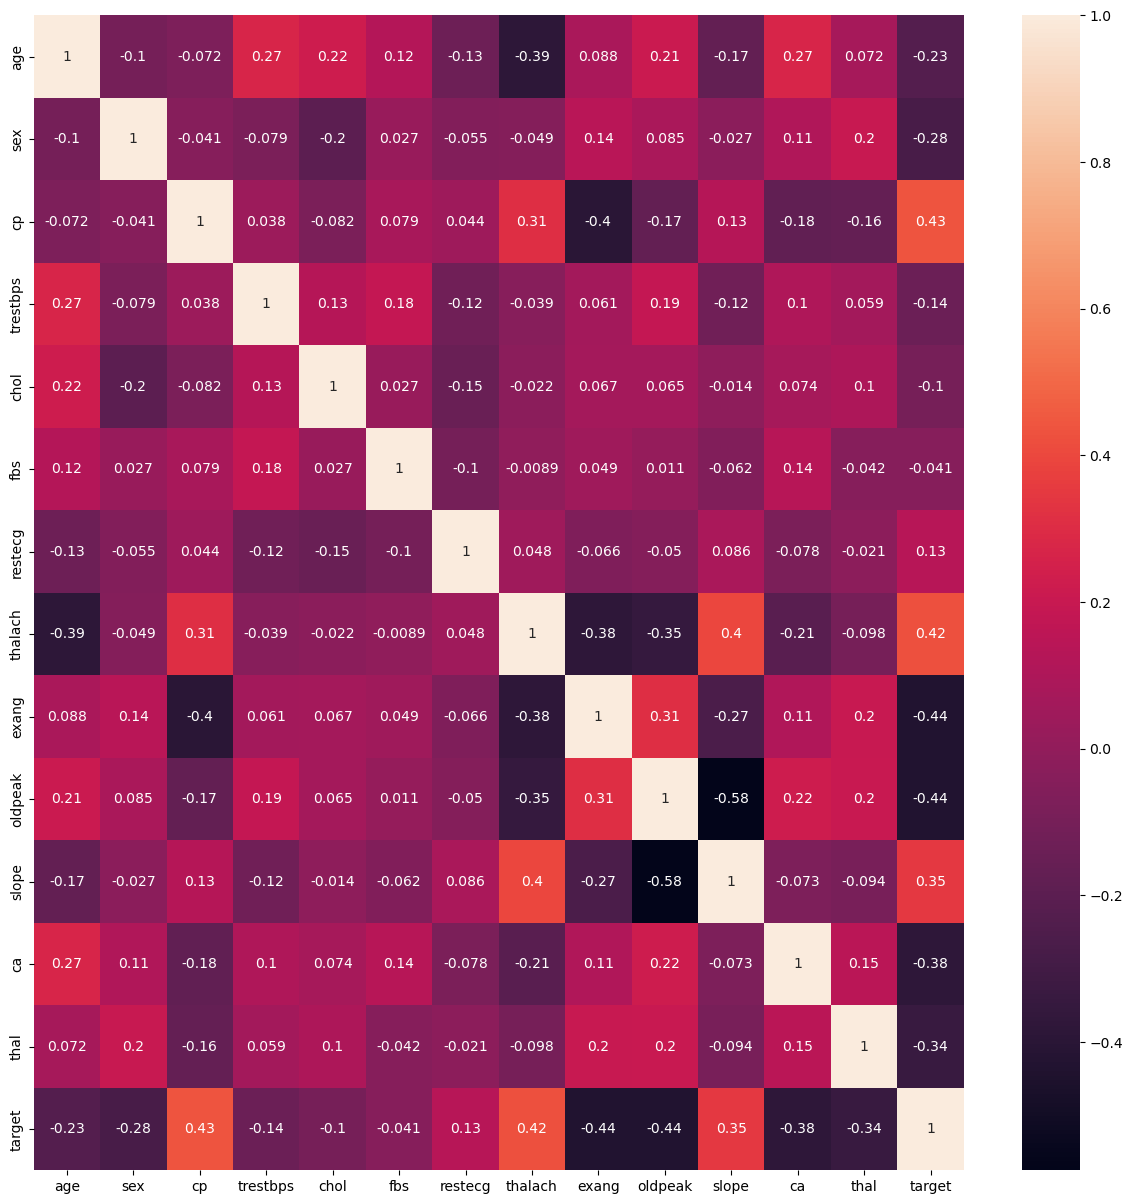

In [16]:
#heatmap
plt.figure(figsize=(15, 15))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

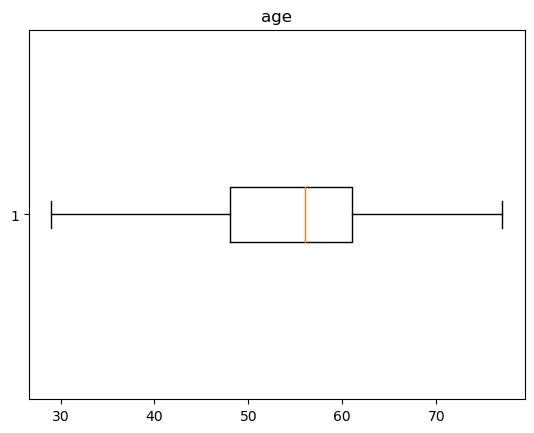

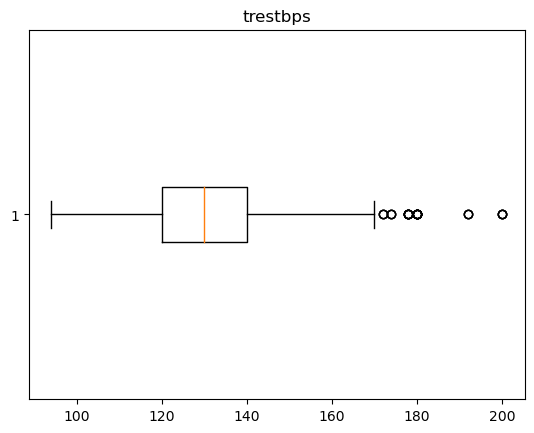

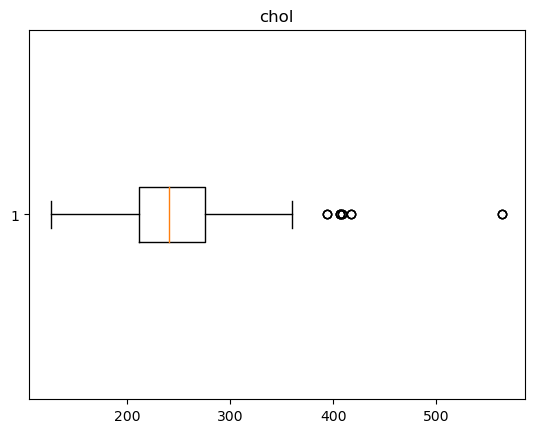

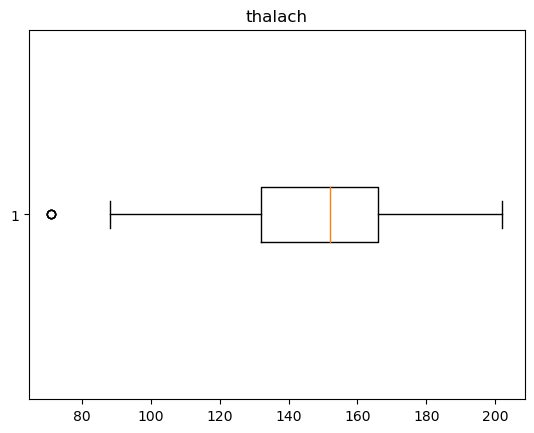

In [17]:
#Handling the outliers
numerical= ['age', 'trestbps', 'chol', 'thalach',] #numerical_features

#creating boxplot for every numerical feature

for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

In [18]:
def remove_outliers(df, x):
    perc = np.percentile(df[x], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    _min = perc[1] - iqr*1.5
    _max = perc[3] + iqr*1.5
    df.loc[df[x] < _min, x] = _min
    df.loc[df[x] > _max, x] = _max
    
    return df

In [19]:
for i in nums[1:]:
    df = remove_outliers(df, i)

In [20]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [42]:
#import libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [43]:
#Logistic Regression
X = df.drop('target', axis=1).values
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logregAcc = accuracy_score(y_test,y_pred)
logregAcc
cm = confusion_matrix(y_test,y_pred)
param_grid = {"n_neighbors": np.arange(1, 10),'metric': ['euclidean', 'manhattan']}
print("acc:",logregAcc)


acc: 0.8093385214007782


In [44]:
#KNN
X = df.drop('target', axis=1).values
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knnAcc = accuracy_score(y_test,y_pred)
knnAcc
cm = confusion_matrix(y_test,y_pred)
param_grid = {"n_neighbors": np.arange(1, 10),'metric': ['euclidean', 'manhattan']}
print("acc:",knnAcc)


acc: 0.7276264591439688


In [45]:
#Decision Tree
X = df.drop('target', axis=1).values
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clfAcc = accuracy_score(y_test,y_pred)
clfAcc
cm = confusion_matrix(y_test,y_pred)
param_grid = {"n_neighbors": np.arange(1, 10),'metric': ['euclidean', 'manhattan']}
print("acc:",clfAcc)


acc: 0.9766536964980544


In [46]:
#svm
X = df.drop('target', axis=1).values
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svm = SVC(random_state=1)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svmAcc = accuracy_score(y_test,y_pred)
svmAcc
cm = confusion_matrix(y_test,y_pred)
param_grid = {"n_neighbors": np.arange(1, 10),'metric': ['euclidean', 'manhattan']}
print("acc:",svmAcc)


acc: 0.688715953307393


In [47]:
#Comparison
data={'Estimators':['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree','Random Forest'],
      'Accuracy':[logregAcc,knnAcc,clfAcc,svmAcc]}

data =pd.DataFrame(data)

data.sort_values('Accuracy', ascending=False)

,Estimators,Accuracy
2,Decision Tree,0.976654
0,Logistic Regression,0.809339
1,K-Nearest Neighbor,0.727626
3,Random Forest,0.688716
